# 트랜스포머 (Transformer)
* 논문 링크: [Attention is All You Need](https://arxiv.org/abs/1706.03762)
* 참고: https://wikidocs.net/31379

  <img src="https://images.velog.io/images/jekim5418/post/79d1b604-b9eb-47a2-b6b1-0e3d158f955d/Transformer%20architecture.png" width="400">

## 1.정의
- Transformer 모델은 2017년 "Attention Is All You Need" 논문에서 소개된 혁신적인 딥러닝 아키텍처입니다. 이 모델은 자연어 처리(NLP) 분야에 큰 변화를 가져왔으며, 현재 대부분의 최신 언어 모델의 기반이 되고 있습니다.

-  이전의 RNN, LSTM과 같은 모델은 다음과 같은 문제점을 가지고 있었습니다.
    - **순차적 처리**: 문장을 단어 단위로 순차적으로 처리하여 병렬화가 어려웠습니다.
    - **장기 의존성 문제**: 긴 문장에서 멀리 떨어진 정보를 연결하는데 어려움이 있었습니다.
    - **계산 복잡도**: 입력 시퀀스가 길어질수록 계산 시간이 기하급수적으로 증가했습니다.

- Transformer 모델은 병렬 처리가 가능한 Self-Attention 메커니즘을 중심으로 설계되었으며, 기존 모델의 제약을 극복하는 데 초점을 맞추고 있습니다.
  - **병렬 처리**: Self-Attention 메커니즘을 통해 전체 입력을 동시에 처리합니다.
  - **장거리 의존성 포착**: 문장 내 모든 단어 간의 관계를 직접적으로 모델링합니다.
  - **확장성**: 대규모 데이터셋에서도 효율적으로 학습이 가능합니다.

## 2.주요 개념

### **Self-Attention**: 문맥 이해의 핵심

Self-Attention은 Transformer의 핵심 메커니즘으로, 입력 시퀀스 내의 각 요소가 다른 모든 요소와 어떻게 관련되는지를 계산합니다.

1. 각 입력 토큰에 대해 Query, Key, Value 벡터를 생성합니다.
2. Query와 모든 Key의 내적을 계산하여 Attention 점수를 얻습니다.
3. 이 점수를 Value 벡터에 적용하여 최종 출력을 생성합니다.

비유: 도서관에서 책 찾기

- **Query**: 당신이 찾고자 하는 책의 특징 (예: "우주에 관한 과학 소설").
- **Key**: 도서관의 각 책에 대한 간단한 설명.
- **Value**: 책의 실제 내용.

Query는 Key를 훑어보고 가장 관련 있는 책의 Value를 자세히 살펴봅니다.

<br>

### **병렬 처리**: 효율성의 비결

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0926580521000595-gr4.jpg">

Transformer는 GPU와 같은 병렬 처리 하드웨어를 최대한 활용할 수 있습니다.


이는 학습 속도와 효율성을 향상시켜 대규모 데이터셋에서 학습 시간을 크게 단축할 수 있습니다.

비유: 공장 생산 라인

- **RNN/LSTM**: 하나의 생산 라인에서 제품을 순차적으로 조립하는 방식.
- **Transformer**: 여러 생산 라인에서 부품을 동시에 만들어 마지막에 조립하는 방식.

## 3.구성 요소

### **입력 임베딩(Input Embedding):**
- 역할: 텍스트 입력(단어 또는 토큰)을 벡터 형태로 변환.
- 의도: 모델이 숫자로 표현된 데이터를 처리할 수 있도록 함.
- 예시
  문장: "고양이는 귀엽다"

  1. 각 단어를 고유한 ID로 변환: 고양이(1), 는(2), 귀엽다(3)
  2. 이 ID를 고차원 벡터로 변환:
     - 고양이 → `[0.1, 0.3, -0.2, ...]`
     - 는 → `[0.5, -0.1, 0.4, ...]`
     - 귀엽다 → `[-0.2, 0.7, 0.1, ...]`

### **포지셔널 인코딩(Positional Encoding):**

* 챗봇, 번역기 등에서 어순은 굉장히 중요함. 어순에 따라 의미가 완전히 반대가 될 수 있음
  - 예시 : 사람이 개를 쫓는다 vs 개를 사람이 쫓는다
* 기존의 RNN은 단어의 위치를 따라 순차적으로 입력받아 단어의 위치정보를 활용할 수 있었음
* 트랜스포머의 경우, RNN을 활용하지 않았기 때문에 단어의 위치정보를 다른 방식으로 줄 필요가 있음
* 이를 위해 **각 단어의 임베딩 벡터에 위치 정보들을 더하게 되는데** 이를 포지셔널 인코딩이라 함
* 보통 포지셔널 인코딩은 sin, cos을 이용하여 계산

<img src="https://kazemnejad.com/img/transformer_architecture_positional_encoding/model_arc.jpg" width="700">

- 역할: 시퀀스에서 각 단어의 위치 정보를 제공.
- 의도: Transformer가 순서를 알 수 있도록 보완.
- 동작 방식: 사인(sin)과 코사인(cos) 함수로 생성된 고정 위치 정보 추가.
- 수학적 표현
  - \\( PE(pos, 2i) = sin(pos / 10000^{2i/d_{model}}) \\)
  - \\( PE(pos, 2i+1) = cos(pos / 10000^{2i/d_{model}}) \\)
  - 여기서 *pos*는 단어의 위치, *i*는 차원을 나타냅니다.

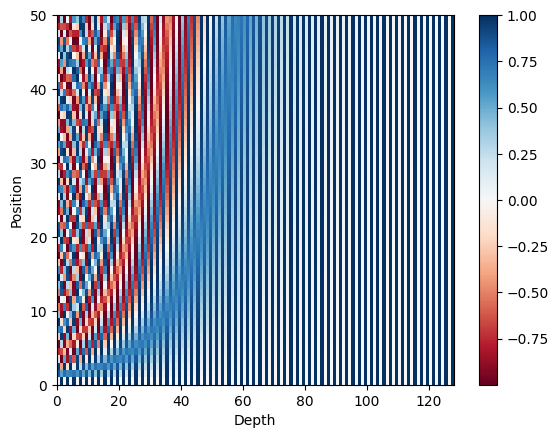

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# PositionalEncoding 클래스: 위치 정보를 임베딩 벡터에 추가하여 순서를 인식할 수 있도록 하는 레이어 정의
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, max_seq_len, d_model):
        # 초기화 메서드: max_seq_len과 d_model 크기를 받아 Positional Encoding 벡터를 생성
        super(PositionalEncoding, self).__init__()
        # positional_encoding 메서드를 호출하여 포지셔널 인코딩 생성
        self.pos_encoding = self.positional_encoding(max_seq_len, d_model)

    def get_angles(self, position, i, d_model):
        # 위치와 임베딩 차원을 기반으로 각도를 계산
        # position: (position, 1) 형태
        # i: (1, d_model) 형태
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        # 각 위치에 대한 각도 값을 반환
        return position * angles

    def positional_encoding(self, position, d_model):
        # 위치와 임베딩 차원에 따른 포지셔널 인코딩 생성
        # position: 포지션 크기, d_model: 모델 차원
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # 짝수 인덱스(2i)에는 사인 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        # 홀수 인덱스(2i+1)에는 코사인 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # 사인과 코사인 값을 결합하여 최종 포지셔널 인코딩 생성
        angle_rads = np.zeros(angle_rads.shape)
        angle_rads[:, 0::2] = sines
        angle_rads[:, 1::2] = cosines

        # 텐서 형태로 변환
        pos_encoding = tf.constant(angle_rads)
        # 배치 차원을 추가
        pos_encoding = pos_encoding[tf.newaxis, ...]

        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
    # 입력이 SparseTensor인 경우 밀집 텐서로 변환
        if isinstance(inputs, tf.SparseTensor):
            inputs = tf.sparse.to_dense(inputs)

        # 포지셔널 인코딩 추가
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

# 샘플 포지셔널 인코딩 시각화
sample_pos_encoding = PositionalEncoding(50, 128)  # 위치 크기 50, 임베딩 차원 128
plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')  # 포지셔널 인코딩 시각화
plt.xlabel('Depth')  # x축 레이블: Depth
plt.xlim((0, 128))  # x축 범위 설정
plt.ylabel('Position')  # y축 레이블: Position
plt.colorbar()  # 컬러바 추가
plt.show()

### **Self Attention:**

Seq2Seq의 어텐션은 입력 시퀀스와 출력 시퀀스 간의 어텐션이었다면, 트랜스포머의 셀프 어텐션은 입력 문장 내에서 단어간 관계성을 파악하는 과정입니다.

<img src="https://www.researchgate.net/publication/350714675/figure/fig1/AS:1010169337094146@1617854546350/An-example-of-the-self-attention-mechanism-following-long-distance-dependency-in-the.png">

### **Multi-Head Attention:**



- 역할: Self-Attention을 병렬적으로 여러 관점(또는 하위 공간)에서 계산하여 더 풍부하고 다양한 문맥 정보를 추출
- 의도: 문장 내 토큰 간의 여러 관계를 동시에 학습하여 복잡한 의존성을 효과적으로 모델링
- 목적: 문맥 정보와 의존성을 다각도로 포착해 더 정확한 표현 학습을 가능하게 함.
- 동작 방식:
  <img src = "https://wikidocs.net/images/page/159310/mha_img_original.png" width=300">

  - 입력 벡터를 Query, Key, Value로 선형 변환 (세 가지 행렬 곱)
  <img src = "https://theaisummer.com/static/56773616d30b9dcb31aa792f2d701276/3096d/key-query-value.png" width="600">

  - 임의로 정한 헤드 개수로 분리(논문에서는 8개의 헤드를 사용하여 64차원의 헤드를 사용)
  - <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcx6fS9%2FbtrTFmhGL1b%2FliEpkqd2KPl2qwvXHPPYD0%2Fimg.png" width="400">
  - 각 Head에서 독립적으로 Self-Attention 계산 (스케일 조정된 점곱 연산 포함).
  - <img src = "https://wikidocs.net/images/page/162098/0_transformer_attention.png" width="400">
  - 각 Head의 출력을 Concatenate한 뒤 다시 선형 변환으로 결합.

    <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcyB5SH%2FbtrTDmwgt1P%2FydDiUHQjW39fUD07xYMrD1%2Fimg.png" width="400">

    <Attention을 통해 학습된 문맥적으로 강화된 임베딩>
- 결과 : 입력 문장의 각 토큰 간 상관관계를 도출해 문맥과 의미를 보다 풍부하게 표현 가능

비유: 다각도로 문장 분석하기
- **문법 전문가**: 문장 구조에 집중.
- **의미론 전문가**: 단어의 의미 관계에 집중.
- **문맥 전문가**: 전체적인 맥락에 집중.

### **Residual Connection:**
Residual Connection은 각 하위 계층(Sublayer)의 출력을 입력과 더하는 구조입니다.  
- <img src="https://miro.medium.com/v2/resize:fit:1400/1*UMHrHYPxQ6KmN89dutvyCQ.png" width="500">
- **수식 표현**:
\\[\text{Output} = \text{LayerNorm}(x + \text{Sublayer}(x))\\]
  
  여기서:
  - \\( x \\): 하위 계층에 입력된 값.
  - \\(\\{Sublayer}(x)\\): Self-Attention 또는 FFNN 층의 출력.
  - \\( \\{LayerNorm}\\): 정규화를 수행하는 Layer Normalization.

- **의도**:
  - 입력과 출력의 정보를 결합하여 모델이 더 풍부한 표현을 학습할 수 있도록 함.
  - 네트워크가 깊어질수록 발생하는 기울기 소실 문제를 완화.

이를 통해 정보 손실을 방지하고 학습을 안정화할 수 있습니다.
- 역할: 입력과 출력의 합을 계산하여 기울기 소실 문제 완화.
- 목적: 정보 손실 방지 및 학습 안정성 제공.

### **Layer Normalization:**
Layer Normalization은 각 계층의 출력을 정규화하여 학습 과정을 안정화합니다.
- **수식 표현**:
\\[y = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} \cdot \gamma + \beta\\]
  여기서:
  - \\( x \\): 계층의 입력.
  - \\( \\mu \\): 입력의 평균.
  - \\( \\sigma \\): 입력의 표준편차.
  - \\( \\epsilon \\): 매우 작은 값(분모가 0이 되는 것을 방지).
  - \\( \\gamma \\), \\( \\beta \\): 학습 가능한 파라미터.

- **작동 방식**:
  - 각 계층에서 입력 데이터를 정규화하여 평균과 분산을 일정하게 유지.
  - 학습 속도를 높이고, 불안정한 변화(Gradient Explosion/Vanishing)를 방지.

- 역할: 각 층의 출력을 정규화하여 학습 안정성 향상.
- 의도: 학습 과정에서의 성능 저하 방지.

### **Residual Connection과 Layer Normalization의 조합**

Transformer는 **Residual Connection**과 **Layer Normalization**을 조합하여 다음과 같은 이점을 제공합니다:

1. **정보 손실 방지**: Residual Connection이 입력 정보를 직접 전달.
2. **학습 안정화**: Layer Normalization이 출력 값을 정규화.
3. **효율적인 학습**: 두 메커니즘의 결합으로 모델이 빠르게 수렴.

### **Feed-Forward Neural Network (FFNN):**
- Attention 층 다음에 오는 완전 연결 층으로 비선형성을 도입하여 모델의 표현력을 높입니다.
- 역할: Attention 결과를 변환하여 더 높은 차원의 표현 학습.
- 의도: 비선형 변환을 통한 복잡한 패턴 학습.

### **Output Layer:**
- 역할: Transformer의 마지막 층으로, 예측을 생성.
- 목적: 텍스트 생성, 분류 등 다양한 태스크 수행.


## 4.Transformer의 주요 동작 단계

Transformer는 입력 문장에서부터 최종 출력 결과를 생성하기까지 다음과 같은 과정을 거칩니다:

1. **입력 문장의 토큰화 및 임베딩**  
   - 입력 문장을 단어 또는 서브워드 단위로 토큰화합니다.  
   - 각 토큰을 고차원 벡터로 변환하여 텍스트 데이터를 수치적으로 표현합니다.

2. **포지셔널 인코딩 추가**  
   - 각 토큰의 위치 정보를 포지셔널 인코딩 벡터로 표현하여 입력 임베딩에 더합니다.  
   - 이는 모델이 입력 시퀀스의 순서를 이해할 수 있도록 돕습니다.

3. **인코더에서 Self-Attention과 FFNN 적용**  
   - Self-Attention 메커니즘을 통해 입력 시퀀스의 각 토큰이 다른 토큰과의 관계를 계산하여 문맥을 이해합니다.  
   - Multi-Head Attention을 사용해 다양한 관점에서 관계를 분석합니다.  
   - FFNN을 통해 비선형 변환을 수행하여 복잡한 패턴을 학습합니다.  
   - Residual Connection과 Layer Normalization으로 안정성을 유지합니다.

4. **디코더에서 마스크드 Self-Attention, 인코더-디코더 Attention, FFNN 적용**  
   - 디코더는 이전 단계에서 생성된 단어를 기반으로 마스크드 Self-Attention을 수행하여 다음 단어를 예측합니다.  
   - 인코더-디코더 Attention을 통해 인코더의 출력과 디코더의 입력 간의 관계를 모델링합니다.  
   - FFNN으로 출력 특징을 변환하고 Residual Connection과 Layer Normalization으로 안정성을 유지합니다.

5. **최종 출력 생성**  
   - 디코더의 마지막 층에서 결과를 생성합니다.  
   - 이를 통해 텍스트 생성, 번역, 요약 등 다양한 자연어 처리 태스크를 수행합니다.



## 간단한 요약

Transformer 모델에서 **다음 단어를 예측하기 위해 현재까지의 단어와 질문(입력 시퀀스)**이 모두 필요한 이유는 인코더-디코더 구조와 Self-Attention 메커니즘의 작동 방식 때문임

1. 인코더-디코더 구조
Transformer 모델은 시퀀스-투-시퀀스 작업에서 주로 사용되며, 두 개의 주요 모듈로 구성:

인코더(Encoder): 질문(입력 시퀀스)을 처리해 고차원 표현(Context Vector)을 생성.
디코더(Decoder): 인코더의 출력(Context Vector)과 현재까지 생성된 단어를 기반으로 다음 단어를 예측.


1. **토큰화 및 임베딩**: 텍스트를 수치 데이터로 변환.  
2. **포지셔널 인코딩 추가**: 순서 정보 제공.  
3. **Self-Attention 계산**: 문맥과 관계를 모델링.  
4. **FFNN 적용**: 비선형 변환으로 패턴 학습.  
5. **Residual Connection과 Normalization**: 학습 안정성 유지.  
6. **디코더 처리**: 예측 및 관계 모델링.  
7. **출력 생성**: 최종 결과 도출.

이 단계들은 Transformer가 자연어를 처리하고 높은 성능을 발휘하는 기반이 됩니다.

## 5.Transformer의 의의와 영향
- 성능 향상: 기계 번역, 텍스트 요약, 질문 답변 등에서 최고 성능을 달성.
- 확장성: GPT, BERT와 같은 대규모 언어 모델의 기반.
- 범용성: NLP를 넘어 컴퓨터 비전, 음성 인식 등 다양한 분야로 확장 가능.

Transformer 모델은 그 혁신적인 구조와 뛰어난 성능으로 현대 NLP의 중심이 되었습니다. 병렬 처리 능력과 장거리 의존성 포착 능력은 이전 모델들의 한계를 극복했으며, 이는 더 큰 모델과 더 다양한 응용으로 이어지고 있습니다. 앞으로도 Transformer는 AI 발전의 핵심 요소로 계속 진화할 것으로 예상됩니다.


## 어텐션



*   트랜스포머 모델의 핵심이 되는 부분
*   트랜스포머에서는 multi-head attention과 self attention이라는 개념을 사용
  1.   multi-head attention
      * 디코더가 가지는 차원을 나누어 병렬로 어텐션을 진행
      *  마지막엔 병렬로 각 진행해 얻은 어텐션 헤드를 모두 연결
      * 이로 인해 다양한 시각에서 정보를 수집할 수 있는 효과를 얻음
  2.   self attention
      *   일반적인 어텐션의 경우, 특정 시점의 디코더 은닉상태와 모든 시점의 인코더 은닉상태를 활용
      *   이는 입력 문장과 다른 문장에 존재하는 단어간의 어텐션을 의미함
      *   반면 self attention은 은닉 상태를 동일하게 하여 어텐션을 진행
      *   이는 입력 문장 내 단어간의 어텐션을 의미함




*   트랜스포머 제안 논문에서는 scaled-dot product attention을 활용해 모델을 작성함



### scaled-dot product attention 구현

* scaled-dot product attention은 앞서 학습한 dot product attention과 거의 유사함
* 단 attention을 진행할 때 어텐션 스코어를 계산할 때 내적 값을 정규화
* 트랜스포머에서는 정규화할 때 K 벡터(=디코더 셀의 은닉 상태)의 차원을 루트를 취한 값을 사용

### multi-head attention 구현

* multi-head attention의 구현 과정
  1. query, key, value에 해당하는 값을 받고, 해당 값에 해당하는 행렬 생성
  2. 생성된 행렬들을 heads에 해당하는 수만큼 분리
  3. 분리한 행렬들에 대해 각각 어텐션을 수행
  4. 각 어텐션 결과들을 연결해 최종 어텐션 결과 생성





Text(0.5, 0, 'Train Step')

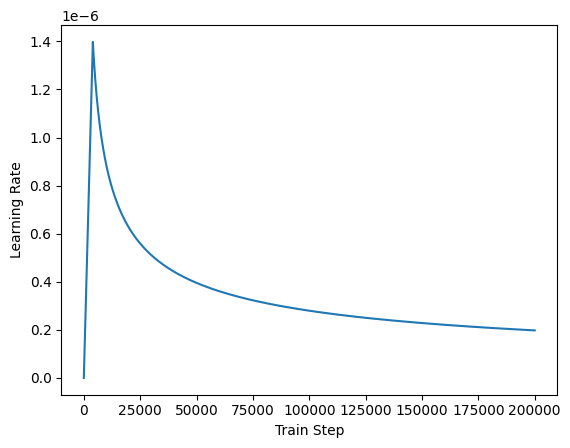

In [ ]:
# Scaled Dot-Product Attention 구현
def scaled_dot_product_attention(query, key, value, mask):
    # query: 쿼리 텐서 (batch_size, num_heads, query_length, depth)
    # key: 키 텐서 (batch_size, num_heads, key_length, depth)
    # value: 값 텐서 (batch_size, num_heads, value_length, depth)
    # mask: 마스킹 텐서 (batch_size, 1, 1, key_length) 또는 None

    # 1. Query와 Key의 내적 수행 (어텐션 스코어 계산)
    matmul_qk = tf.matmul(query, key, transpose_b=True)  # (batch_size, num_heads, query_length, key_length)

    # 2. 스케일링: Key의 차원수의 제곱근으로 나누기 (값의 크기를 안정화)
    depth = tf.cast(tf.shape(key)[-1], tf.float32)  # key의 depth 추출
    logits = matmul_qk / tf.math.sqrt(depth)  # 어텐션 점수 스케일링

    # 3. 마스킹 적용 (패딩 위치 무시)
    if mask is not None:
        logits += (mask * -1e9)  # 매우 작은 값을 추가하여 softmax에서 0으로 만듦

    # 4. 소프트맥스 적용하여 어텐션 가중치 계산
    attention_weights = tf.nn.softmax(logits, axis=-1)  # (batch_size, num_heads, query_length, key_length)

    # 5. 가중치를 Value 텐서에 곱하여 최종 어텐션 출력 계산
    output = tf.matmul(attention_weights, value)  # (batch_size, num_heads, query_length, depth)

    return output, attention_weights

# Multi-Head Attention 레이어 정의
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        # 초기화 메서드: 모델 차원과 헤드 개수를 받아 초기화
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads  # 멀티 헤드 개수
        self.d_model = d_model  # 전체 모델 차원

        assert d_model % self.num_heads == 0  # d_model은 num_heads로 나누어떨어져야 함

        self.depth = d_model // self.num_heads  # 각 헤드가 처리할 차원수

        # WQ, WK, WV를 위한 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)  # 쿼리 변환
        self.key_dense = tf.keras.layers.Dense(units=d_model)  # 키 변환
        self.value_dense = tf.keras.layers.Dense(units=d_model)  # 값 변환

        # WO를 위한 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)  # 최종 결합

    def split_heads(self, inputs, batch_size):
        # 입력 텐서를 헤드 개수만큼 분리
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])  # 헤드 차원을 앞으로 이동

    def call(self, inputs):
        # 입력 텐서: query, key, value, mask
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]  # 배치 크기 추출

        # 1. 쿼리, 키, 값 변환
        query = self.query_dense(query)  # 쿼리 변환
        key = self.key_dense(key)  # 키 변환
        value = self.value_dense(value)  # 값 변환

        # 2. 헤드 분리
        query = self.split_heads(query, batch_size)  # 쿼리 분리
        key = self.split_heads(key, batch_size)  # 키 분리
        value = self.split_heads(value, batch_size)  # 값 분리

        # 3. Scaled Dot-Product Attention 수행
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # 원래 차원으로 복원

        # 4. 헤드 결합
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # 5. 최종 밀집층 적용
        outputs = self.dense(concat_attention)

        return outputs  # 최종 출력


# 패딩 마스크 생성 함수
def create_padding_mask(x):
    '''
    입력 시퀀스에서 패딩 토큰(값 0) 위치를 식별하여 마스크 생성
    패딩 마스크는 입력 시퀀스에서 패딩 토큰(보통 0으로 표현됨)을 감지하여,
    Self-Attention 또는 Scaled Dot-Product Attention이 패딩 토큰을 무시하도록 만들어 줌
    '''
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)  # 패딩 위치는 1, 나머지는 0
    return mask[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

# 인코더 레이어 정의
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
    # dff: 피드포워드 네트워크의 은닉층 크기
    # d_model: 임베딩 차원
    # num_heads: 멀티 헤드 개수
    # dropout: 드롭아웃 비율

    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")  # 입력 텐서 정의
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")  # 패딩 마스크 입력

    # 1. 멀티 헤드 어텐션 수행
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
            'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
            'mask': padding_mask  # 패딩 마스크 사용
        })

    # 2. 드롭아웃 및 잔차 연결 + 층 정규화
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)  # 드롭아웃 적용
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)  # 잔차 연결 및 정규화

    # 3. 포지션 와이즈 피드포워드 네트워크
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)  # 첫 번째 밀집층
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)  # 두 번째 밀집층

    # 4. 드롭아웃 및 잔차 연결 + 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)  # 드롭아웃 적용
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)  # 잔차 연결 및 정규화

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

# 인코더 구현
def encoder(vocab_size, num_layers, dff, d_model, num_heads, dropout, name="encoder"):
    # vocab_size: 단어 집합 크기
    # num_layers: 인코더 레이어 개수
    # dff: 피드포워드 신경망 은닉층 크기
    # d_model: 임베딩 차원
    # num_heads: 멀티 헤드 개수
    # dropout: 드롭아웃 비율

    inputs = tf.keras.Input(shape=(None,), name="inputs")  # 입력 시퀀스 정의
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")  # 패딩 마스크 정의

    # 1. 임베딩 + 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)  # 단어를 임베딩 벡터로 변환
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))  # 임베딩 벡터 스케일링
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)  # 포지셔널 인코딩 추가
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)  # 드롭아웃 적용

    # 2. 인코더 레이어를 여러 개 쌓기
    for i in range(num_layers):
        outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
                                 dropout=dropout, name="encoder_layer_{}".format(i))(
            [outputs, padding_mask])

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

# 디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수
def create_look_ahead_mask(x):
    # 입력 시퀀스의 크기를 가져와 look-ahead 마스크 생성
    seq_len = tf.shape(x)[1]  # 입력 시퀀스 길이

    # 1. 대각선 기준 상단 삼각형에 1을 설정하여 미래 단어 마스킹
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)  # 상단 삼각형 마스크 생성

    # 2. 패딩 마스크 생성
    padding_mask = create_padding_mask(x)  # 기존 패딩 마스크 호출

    # 3. 룩어헤드 마스크와 패딩 마스크 중 더 큰 값을 가져옴 (마스킹 결합)
    return tf.maximum(look_ahead_mask, padding_mask)  # 최종 마스크 반환


    # 첫 번째 서브층: 멀티-헤드 어텐션 (마스크드 셀프 어텐션)
    # query = key = value = inputs
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
            'query': inputs, 'key': inputs, 'value': inputs,
            'mask': look_ahead_mask  # 룩어헤드 마스크 적용
        })

    # 첫 번째 서브층: 잔차 연결과 층 정규화
    # inputs + attention1: 잔차 연결 (skip connection)
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)

    # 두 번째 서브층: 멀티-헤드 어텐션 (디코더-인코더 어텐션)
    # query = attention1, key = value = enc_outputs
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
            'query': attention1, 'key': enc_outputs, 'value': enc_outputs,
            'mask': padding_mask  # 패딩 마스크 적용
        })

    # 두 번째 서브층: 드롭아웃 + 잔차 연결 + 층 정규화
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)  # 드롭아웃 적용
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)  # 잔차 연결과 정규화

    # 세 번째 서브층: 포지션 와이즈 피드포워드 네트워크
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)  # 첫 번째 밀집층
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)  # 두 번째 밀집층

    # 세 번째 서브층: 드롭아웃 + 잔차 연결 + 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)  # 드롭아웃 적용
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)  # 잔차 연결과 정규화

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': look_ahead_mask # 룩어헤드 마스크
      })

  # 잔차 연결과 층 정규화
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
          'mask': padding_mask # 패딩 마스크
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
    # 디코더 전체를 정의하는 함수
    # vocab_size: 단어 집합 크기
    # num_layers: 디코더 레이어 개수
    # dff: 피드포워드 네트워크의 은닉층 크기
    # d_model: 모델의 차원 크기
    # num_heads: 멀티-헤드 어텐션의 헤드 수
    # dropout: 드롭아웃 비율

    # 디코더 입력: (batch_size, seq_len)
    inputs = tf.keras.Input(shape=(None,), name='inputs')

    # 인코더 출력: (batch_size, seq_len, d_model)
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

    # 룩어헤드 마스크 입력: 미래 정보를 차단하는 마스크 (batch_size, 1, seq_len, seq_len)
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')

    # 패딩 마스크 입력: 패딩 토큰을 차단하는 마스크 (batch_size, 1, 1, seq_len)
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)  # 임베딩 수행
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))  # 임베딩 벡터 스케일링
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)  # 포지셔널 인코딩 추가
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)  # 드롭아웃 적용

    # 디코더 레이어를 num_layers만큼 쌓기
    for i in range(num_layers):
        outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
                                 dropout=dropout, name='decoder_layer_{}'.format(i))(
            inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

def transformer(vocab_size, num_layers, dff,
                d_model, num_heads, dropout,
                name="transformer"):
    # Transformer 모델 전체를 정의하는 함수
    # vocab_size: 단어 집합 크기
    # num_layers: 인코더와 디코더의 레이어 개수
    # dff: 피드포워드 네트워크의 은닉층 크기
    # d_model: 모델의 차원 크기
    # num_heads: 멀티-헤드 어텐션의 헤드 수
    # dropout: 드롭아웃 비율

    # 인코더의 입력: (batch_size, input_seq_len)
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 디코더의 입력: (batch_size, target_seq_len)
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더의 패딩 마스크: 패딩 토큰을 차단하는 마스크 생성
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더의 룩어헤드 마스크: 미래 정보를 차단하는 마스크 생성
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 디코더의 패딩 마스크: 패딩 토큰을 차단하는 마스크 생성
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # 인코더 출력: (batch_size, input_seq_len, d_model)
    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
                          d_model=d_model, num_heads=num_heads, dropout=dropout)(
        inputs=[inputs, enc_padding_mask])

    # 디코더 출력: (batch_size, target_seq_len, d_model)
    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
                          d_model=d_model, num_heads=num_heads, dropout=dropout)(
        inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 출력층: 다음 단어를 예측하기 위한 밀집층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)


# 손실 함수 정의
def loss_function(y_true, y_pred):
    # y_true 텐서를 재구성. 원래의 정답 데이터 크기를 (-1, MAX_LENGTH - 1)로 맞춘다.
    # -1은 배치 크기를 자동으로 맞추는 역할을 한다.
    y_true = tf.reshape(y_true, shape=(-1, max_seq_len - 1))
    # y_pred의 마지막 시퀀스(패딩된 토큰) 제거
    y_pred = y_pred[:, :-1, :]
    # SparseCategoricalCrossentropy는 정수 형태의 라벨과 로짓 값을 비교하여 손실을 계산한다.
    # from_logits=True로 설정하여 y_pred가 로짓 값임을 명시.
    # reduction='none'으로 설정하여 각 데이터 포인트에 대해 개별 손실 값을 반환.
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True,
        reduction='none',
        )(y_true, y_pred)
    # 마스크 생성: y_true 값이 0(패딩)인 경우는 제외하기 위해 사용.
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)

    # 손실에 마스크를 적용하여 패딩에 해당하는 손실을 0으로 만든다.
    loss = tf.multiply(loss, mask)

    # 마스크가 적용된 손실 값의 평균을 계산하여 반환.
    return tf.reduce_mean(loss)

# 학습률 스케줄링 클래스 정의
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000, initial_lr=1e-3):
        # 부모 클래스의 초기화 메서드 호출
        super(CustomSchedule, self).__init__()

        # 모델 차원 수(d_model)와 워밍업 스텝 수(warmup_steps) 저장.
        self.d_model = d_model
        # d_model을 float32로 변환하여 텐서 계산에 사용.
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps
        self.initial_lr = initial_lr  # 초기 학습률 추가

    # 학습률 계산 메서드 정의
    def __call__(self, step):
        # step을 float32로 변환
        step = tf.cast(step, tf.float32)
        # step의 역제곱근 (decay 효과)
        arg1 = tf.math.rsqrt(step)
        # step에 기반한 워밍업 단계 계산
        arg2 = step * (self.warmup_steps**-1.5)
        #return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
        return self.initial_lr * tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

# 샘플 학습률 스케줄링 객체 생성 및 시각화
sample_learning_rate = CustomSchedule(d_model=128)

# 학습률이 어떻게 변화하는지 그래프로 표시
plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")  # y축 레이블 설정
plt.xlabel("Train Step")     # x축 레이블 설정

## 6.전체 코드 구현

In [ ]:
# 데이터 처리 및 학습을 위한 라이브러리 임포트
import pandas as pd                 # 데이터프레임과 CSV 파일 처리를 위한 라이브러리
import urllib.request               # URL에서 파일 다운로드를 위한 라이브러리
import tensorflow_datasets as tfds  # 텐서플로 데이터셋 로드 및 토크나이징 유틸리티
import tensorflow as tf             # 딥러닝 프레임워크
import time                         # 학습 시간 측정을 위한 라이브러리
import numpy as np                  # 수학 계산 및 배열 처리를 위한 라이브러리
import matplotlib.pyplot as plt     # 그래프 및 데이터 시각화를 위한 라이브러리
import re                           # 정규 표현식 처리를 위한 라이브러리

# 챗봇 데이터 다운로드 및 로드
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv",
    filename="ChatBotData.csv")  # URL에서 챗봇 데이터를 로컬로 다운로드

# 챗봇 데이터 CSV 파일을 데이터프레임으로 읽어오기
train_data = pd.read_csv('ChatBotData.csv')

# 데이터프레임 상위 5개 샘플 출력
train_data.head()

# 데이터의 총 개수 출력
print('챗봇 샘플의 개수 :', len(train_data))

# 결측치 확인: 각 열의 결측치 개수 출력
print(train_data.isnull().sum())

# 질문 데이터 전처리
questions = []
for sentence in train_data['Q']:
    # 구두점 앞에 공백을 추가하는 전처리
    # ex) "12시 땡!" -> "12시 땡 !"
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()  # 양쪽 공백 제거
    questions.append(sentence)

# 답변 데이터 전처리
answers = []
for sentence in train_data['A']:
    # 동일한 전처리 수행
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()  # 양쪽 공백 제거
    answers.append(sentence)

# 전처리된 질문 데이터의 길이 출력
len(questions)

# 전처리된 질문과 답변 데이터 일부 확인
print(questions[:5])
print(answers[:5])

# 서브워드 텍스트 인코더를 사용하여 질문과 답변 데이터의 단어 집합(Vocabulary) 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

# 시작 토큰과 종료 토큰에 대해 정수 값을 할당
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 및 종료 토큰을 고려하여 단어 집합 크기(VOCAB_SIZE) + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

# 시작 및 종료 토큰 번호와 단어 집합 크기 출력
print('시작 토큰 번호 :', START_TOKEN)
print('종료 토큰 번호 :', END_TOKEN)
print('단어 집합의 크기 :', VOCAB_SIZE)

# 텍스트 시퀀스를 정수 시퀀스로 변환한 샘플 출력
print('Tokenized sample question: {}'.format(tokenizer.encode(questions[20])))

# 서브워드 텍스트 인코더의 encode()와 decode() 테스트

# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]

# encode(): 텍스트 시퀀스를 정수 시퀀스로 변환
tokenized_string = tokenizer.encode(sample_string)
print('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# decode(): 정수 시퀀스를 텍스트 시퀀스로 변환
original_string = tokenizer.decode(tokenized_string)
print('기존 문장: {}'.format(original_string))

# 각 정수가 각 단어와 어떻게 매핑되는지 확인
# 서브워드 텍스트 인코더는 텍스트를 의미 있는 서브워드 단위로 분할
# 이 방식은 띄어쓰기 단위나 형태소 분석 단위가 아니라, 자주 등장하는 문자 조합으로 나눈다.
for ts in tokenized_string:
    print('{} ----> {}'.format(ts, tokenizer.decode([ts])))

# 토큰화 및 패딩 함수 정의
def tokenize_and_filter(inputs, outputs, max_seq_len):
    """
    주어진 입력과 출력 텍스트를 정수 시퀀스로 변환하고 패딩을 추가.

    Args:
    - inputs (list): 입력 문장 리스트
    - outputs (list): 출력 문장 리스트

    Returns:
    - tokenized_inputs: 패딩이 적용된 입력 정수 시퀀스
    - tokenized_outputs: 패딩이 적용된 출력 정수 시퀀스
    """
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        # 시작 토큰과 종료 토큰을 추가한 정수 시퀀스 생성
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        tokenized_inputs.append(sentence1)
        tokenized_outputs.append(sentence2)

    # 입력 및 출력 시퀀스에 대해 패딩 적용
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=max_seq_len, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=max_seq_len, padding='post')

    return tokenized_inputs, tokenized_outputs

max_seq_len = 40
# 질문과 답변 데이터에 대해 토큰화 및 패딩 적용
questions, answers = tokenize_and_filter(questions, answers, max_seq_len)

# 질문 및 답변 데이터의 크기(shape) 출력
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

# 0번째 샘플 출력
print(questions[0])  # 패딩된 정수 시퀀스로 변환된 첫 번째 질문
print(answers[0])    # 패딩된 정수 시퀀스로 변환된 첫 번째 답변

# 단어 집합의 크기 및 전체 샘플 개수 출력
print('단어 집합의 크기(Vocab size): {}'.format(VOCAB_SIZE))
print('전체 샘플의 수(Number of samples): {}'.format(len(questions)))

# 텐서플로우 데이터셋으로 변환
# 셔플, 배치 구성, 그리고 교사 강요(teacher forcing)를 위해 데이터셋 생성
BATCH_SIZE = 128    # 배치 크기 설정
BUFFER_SIZE = 20000  # 셔플 버퍼 크기 설정

# 디코더 입력(dec_inputs)과 실제값(outputs) 시퀀스 생성
# 디코더 입력은 답변 시퀀스에서 마지막 패딩 토큰을 제거
# 디코더 출력은 답변 시퀀스에서 시작 토큰을 제거
# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions, # 입력 데이터
        'dec_inputs': answers[:, :-1] # 디코더 입력 데이터. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers[:, 1:]  # 디코더 출력 데이터. 맨 처음 시작 토큰이 제거된다.
    },
))

# 데이터셋 캐시, 셔플링, 배치 구성 및 사전 로드(prefetch) 설정
dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

# 디코더 시퀀스 확인
# [:, :-1]: 마지막 패딩 토큰 제거
# [:, 1:]: 시작 토큰 제거
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 39가 된다. / 디코더 입력
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 39가 된다. / 디코더 출력

챗봇 샘플의 개수 : 11823
Q        0
A        0
label    0
dtype: int64
['12시 땡 !', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네']
['하루가 또 가네요 .', '위로해 드립니다 .', '여행은 언제나 좋죠 .', '여행은 언제나 좋죠 .', '눈살이 찌푸려지죠 .']
시작 토큰 번호 : [8178]
종료 토큰 번호 : [8179]
단어 집합의 크기 : 8180
Tokenized sample question: [5766, 611, 3509, 141, 685, 3747, 849]
정수 인코딩 후의 문장 [5766, 611, 3509, 141, 685, 3747, 849]
기존 문장: 가스비 비싼데 감기 걸리겠어
5766 ----> 가스
611 ----> 비 
3509 ----> 비싼
141 ----> 데 
685 ----> 감기 
3747 ----> 걸리
849 ----> 겠어
질문 데이터의 크기(shape) : (11823, 40)
답변 데이터의 크기(shape) : (11823, 40)
[8178 7915 4207 3060   41 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
단어 집합의 크기(Vocab size): 81

In [ ]:
# 텐서플로 세션 초기화
tf.keras.backend.clear_session()

# 하이퍼파라미터 정의
NUM_LAYERS = 2        # Transformer의 인코더와 디코더 레이어 수
D_MODEL = 256         # 임베딩 차원 (토큰을 벡터로 변환할 때의 차원 크기)
NUM_HEADS = 8         # 멀티헤드 어텐션에서의 헤드 수
DFF = 512             # 피드포워드 네트워크의 내부 신경망 크기
DROPOUT = 0.1         # 드롭아웃 비율

# Transformer 모델 생성
# transformer()는 미리 정의된 함수로, 이 부분의 구체적인 내부는 따로 구현되어야 함.
model = transformer(
    vocab_size=VOCAB_SIZE,    # 전체 단어 집합 크기
    num_layers=NUM_LAYERS,    # 인코더/디코더 레이어 수
    dff=DFF,                  # 피드포워드 네트워크 크기
    d_model=D_MODEL,          # 임베딩 차원 크기
    num_heads=NUM_HEADS,      # 멀티헤드 어텐션 헤드 수
    dropout=DROPOUT,          # 드롭아웃 비율
    )

# Transformer 모델 구조 시각화
# 각 레이어의 입력과 출력 크기를 보여줌
tf.keras.utils.plot_model(
    model, to_file='small_transformer.png', show_shapes=True)


# # 학습률 스케줄링 설정
# # CustomSchedule 클래스는 워밍업 및 학습률 감소를 적용
# learning_rate = CustomSchedule(512)

# # Adam 옵티마이저 정의
# # 학습률 스케줄링을 사용하고, Transformer에 적합한 beta1, beta2 값을 설정
optimizer = tf.keras.optimizers.Adam(
    0.0005,         # 학습률 스케줄링
    beta_1=0.9,            # 1차 모멘텀 감쇠 계수
    beta_2=0.98,           # 2차 모멘텀 감쇠 계수
    epsilon=1e-9           # 숫자 안정성을 위한 작은 값
)


# 정확도 측정 함수 정의
def accuracy(y_true, y_pred):
    """
    정확도 계산 함수. 각 시점에서 예측한 값이 실제 값과 얼마나 일치하는지 확인.

    Args:
    - y_true (tf.Tensor): 실제 값. (배치 크기, max_seq_len - 1) 형태로 맞춰야 함.
    - y_pred (tf.Tensor): 모델의 예측값. (배치 크기, max_seq_len - 1, VOCAB_SIZE) 형태.

    Returns:
    - tf.Tensor: 각 시점의 정확도.
    """
    # 실제 값을 (배치 크기, max_seq_len - 1) 형태로 재구성
    y_true = tf.reshape(y_true, shape=(-1, max_seq_len - 1))

    # y_pred의 마지막 시점을 제외하고, (배치 크기, max_seq_len - 1, VOCAB_SIZE)로 슬라이싱
    y_pred = y_pred[:, :max_seq_len - 1, :]

    # sparse_categorical_accuracy는 정수형 라벨과 확률 벡터를 비교하여 정확도를 계산
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# 모델 컴파일
# 옵티마이저, 손실 함수, 정확도 평가 지표 설정
model.compile(
    optimizer=optimizer,       # Adam 옵티마이저
    loss=loss_function,        # 손실 함수
    metrics=[accuracy]         # 평가 지표: 정확도
)

# 학습 횟수(Epochs) 설정
EPOCHS = 20

# 모델 학습
# 데이터셋을 입력으로 사용하여 모델을 EPOCHS 동안 학습
model.fit(dataset, epochs=EPOCHS)

In [ ]:
# 모델 평가 함수 정의
def evaluate(sentence):
    """
    입력 문장을 모델에 넣어 답변을 생성.

    Args:
    - sentence (str): 입력 문장.

    Returns:
    - tf.Tensor: 생성된 답변의 정수 시퀀스.
    """
    # 입력 문장을 전처리
    sentence = preprocess_sentence(sentence)

    # 시작 토큰과 종료 토큰을 포함한 정수 시퀀스 생성
    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # 디코더의 초기 입력은 시작 토큰
    output = tf.expand_dims(START_TOKEN, 0)

    # 최대 길이(max_seq_len) 동안 디코더 반복(예측 시작)
    for i in range(max_seq_len):
        # 모델에 입력과 디코더 출력을 넣어 예측 수행
        predictions = model(inputs=[sentence, output], training=False)
        # 현재 시점에서의 예측 단어 추출
        predictions = predictions[:, -1:, :]  # 마지막 시점의 출력
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)  # 예측 단어 ID

        # 종료 토큰을 예측한 경우 반복 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # 현재 예측 단어를 디코더 입력에 추가
        # 마지막 시점의 예측 단어를 출력에 연결한다.
        # 이는 for문을 통해서 디코더의 입력으로 사용될 예정이다.
        output = tf.concat([output, predicted_id], axis=-1)

    # 최종적으로 생성된 시퀀스를 반환
    return tf.squeeze(output, axis=0)


# 문장 생성 함수 정의
def predict(sentence):
    """
    모델로부터 입력 문장에 대한 답변 생성.

    Args:
    - sentence (str): 입력 문장.

    Returns:
    - str: 생성된 답변.
    """
    # 평가 함수 호출
    prediction = evaluate(sentence)

    # 정수 시퀀스를 텍스트 시퀀스로 변환
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size])  # 토큰 ID를 단어로 변환

    # 입력과 출력 문장 출력
    print('Input: {}'.format(sentence))
    print('Output: {}'.format(predicted_sentence))

    return predicted_sentence

# 입력 문장 전처리 함수 정의
def preprocess_sentence(sentence):
    """
    입력 문장에 대해 전처리 수행.

    Args:
    - sentence (str): 입력 문장.

    Returns:
    - str: 전처리된 문장.
    """
    # 구두점 앞에 공백 추가
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()  # 공백 제거
    return sentence

In [ ]:
output = predict('영화 볼래?')

output = predict("고민이 있어")

output = predict("너무 화가나")

output = predict("게임하고싶은데 할래?")

output = predict("나 너 좋아하는 것 같아")

output = predict("딥 러닝 자연어 처리를 잘 하고 싶어")